# 🧠 Computer Vision – Lecture 7 (Professional Optimization Lab)

## 🎯 Topic: CVAT Annotation → Training → Prediction → Evaluation

**Instructor:** Azeem Aslam<br>
**Duration:** 2–3 Hours (Lab + Practice)


## 🔄 Transition From Previous Lab (Very Important)

### 📌 What students did previously?

In **previous lab**, students:

✔ Collected images<br>
✔ Used **Roboflow** for basic annotation<br>
✔ Trained a basic YOLO helmet detection model<br>

Roboflow helped us **learn the concept** of annotation quickly.


## 🚀 Why We Move From Roboflow to CVAT?

Now we move to **engineer-level annotation**.

### 🔴 Limitations of Roboflow (for real projects)

* Limited control on box precision<br>
* Not ideal for **complex / large datasets**<br>
* Companies rarely use it for production annotation<br>

## ✅ Why CVAT is Used in Industry

**CVAT (Computer Vision Annotation Tool)** is used by:

* AI companies
* Surveillance projects
* Autonomous driving teams
* Government & enterprise projects

CVAT gives:

✔ Pixel-accurate boxes<br>
✔ Full control over labels<br>
✔ Professional annotation workflow<br>
✔ Better model accuracy<br>

👉 **Better annotation = Better model performance**

That’s why we shift to CVAT.

# 🧩 PART 1 — CVAT Installation & Setup (Lab Step)

### Step 1: Open CVAT (Choose One)

**Option A (Recommended for beginners):**<br>
👉 [https://app.cvat.ai](https://app.cvat.ai) (Cloud – no install)

**Option B (Advanced):**
Local CVAT using Docker (later topic)

### Step 2: Create Account & Login

* Sign up with Gmail
* Login to CVAT dashboard


### Step 3: Create New Project

1. Click **Create Project**
2. Project Name:

   ```
   Helmet_Detection_CVAT
   ```
3. Add Labels:

   * Helmet
   * no_Helmet

⚠️ **Exact spelling matters**


# 🧩 PART 2 — Dataset Upload in CVAT

### Dataset Requirement (Tell Students Clearly)

* Minimum: **250 images**
* Diverse:

  * Different angles
  * Different lighting
  * Different people
  * Indoor + outdoor

### Upload Images

1. Open project
2. Create **New Task**
3. Upload all images
4. Select labels (Helmet, NoHelmet)
5. Create task


# 🧩 PART 3 — Annotation Process (Step by Step)

### How to Annotate Correctly

For **each image**:

1. Select **Rectangle Tool**
2. Draw bounding box
3. Assign label:

   * Helmet → if helmet present
   * no_Helmet → if head without helmet



### Annotation Rules (Very Important)

✔ Box should tightly cover object<br>
✔ Do NOT include background<br>
✔ Partial helmet → still Helmet<br>
✔ One object = one box<br>

Bad annotation = bad model (always remind).

### Save Annotation

* CVAT auto-saves
* Check next image
* Complete all images

# 🧩 PART 4 — Export Dataset From CVAT

After annotation:

1. Click **Export**
2. Format:
   👉 **YOLO 1.1**
3. Download ZIP
4. Extract folder

### Final Dataset Structure (Verify)

```
dataset/
├── images/
│   ├── train/
│   └── val/
├── labels/
│   ├── train/
│   └── val/
└── data.yaml
```

If structure wrong → training fails.

### Create dataset.yaml file

In Jupyter:

In [1]:
yaml_content = """
path: C:/Users/User/OpenCV/Lecture 7/dataset

train: images/train
val: images/val

nc: 2
names: ['helmet', 'no_helmet']
"""

with open("C:/Users/User/OpenCV/Lecture 7/dataset/data.yaml", "w") as f:
    f.write(yaml_content)

print("data.yaml created successfully.")

data.yaml created successfully.


# 🧩 PART 5 — Model Training (Clean & Proper)

### Step 1: Install YOLO

In [ ]:
!pip install ultralytics

### Step 2: Load Model

In [2]:
from ultralytics import YOLO

In [3]:
model =  YOLO("OpenCV/yolov8n.pt")

### Step 3: Train Model

In [4]:
model.train(
    data="dataset/data.yaml",
    imgsz=640,
    epochs=80,
    batch=8,
    patience=20,
    workers=2,
    lr0=0.003,
    optimizer="Adam",
    weight_decay=0.0005,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=5,
    scale=0.3,
    fliplr=0.5
)

New https://pypi.org/project/ultralytics/8.4.13 available  Update with 'pip install -U ultralytics'
Ultralytics 8.4.12  Python-3.13.9 torch-2.10.0+cpu CPU (13th Gen Intel Core i7-1355U)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=5, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.003, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=OpenCV/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001C4492E63C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

# YOLO Training Parameters — Proper Explanation

## Dataset parameter

**data = "dataset/data.yaml"** <br>
This file tells YOLO:

* where images are stored
* where labels are stored
* number of classes
* class names

Without this file, training cannot start.

---

## Image size

**imgsz = 640**<br>
Defines the resolution used during training.

Higher size:

* better accuracy
* slower training

Lower size:

* faster training
* less detail

640 is the **standard YOLO size** and gives a good balance between speed and accuracy.

---

## Epochs

**epochs = 80**<br>
One epoch means the model sees the entire dataset once.

80 epochs means:

> the model learns from the dataset 80 times.

Too many epochs → overfitting<br>
Too few epochs → underfitting

For small datasets, 50–100 epochs is ideal.

---

## Batch size

**batch = 8**<br>
Number of images processed together in one training step.

Large batch:

* faster training
* needs more RAM/GPU memory

Small batch:

* safer for small datasets
* more stable training

---

## Early stopping

**patience = 20**<br>
Stops training if validation accuracy does not improve for 20 epochs.

This prevents:

* overfitting
* wasting training time

Used in almost all professional training pipelines.

---

## Workers

**workers = 2**<br>
Number of CPU threads used for loading images.

More workers:

* faster data loading
* more CPU usage

For normal laptops:

```
2–4 workers is ideal
```

---

## Learning rate

**lr0 = 0.003**<br>

Controls how much model weights change during training.

If learning rate is too high:

* training becomes unstable
* loss jumps up and down

If learning rate is too low:

* training becomes very slow

Interview explanation:

> Learning rate controls how quickly the model updates its weights during training.

---

## Optimizer

**optimizer = "Adam"** <br>

Optimizer updates model weights.

Common options:

* SGD
* Adam

Comparison:

SGD:

* very stable
* used for large datasets

Adam:

* faster convergence
* good for small datasets

Since your dataset is small (251 images), **Adam is a good choice**.

---

## Weight decay

**weight_decay = 0.0005** <br>

This is a regularization technique.

It helps:

* prevent overfitting
* keep model weights small

Very important when dataset is small.

---

# Data Augmentation Parameters

These make the model more robust.

They simulate new training images.

---

## Color augmentation

**hsv_h = 0.015** → hue change<br>
**hsv_s = 0.7** → saturation change<br>
**hsv_v = 0.4** → brightness change

Helps model work in:

* different lighting
* different cameras
* outdoor conditions

---

## Rotation

**degrees = 5** <br>

Randomly rotates images slightly.

Helps detect objects from different angles.

---

## Scale

**scale = 0.3** <br>

Random zoom in/out during training.

Helps model detect objects at different distances.

---

## Horizontal flip

**fliplr = 0.5** <br>

50% chance image flips horizontally.

Important for:

* helmet detection
* human detection
* vehicle detection

---

# Professional summary (important)

Your training setup is:

* correct <br>
* realistic<br>
* industry-style<br>
* suitable for small datasets

This is **not beginner-level config anymore** — this is closer to real project training.

# 🧩 PART 6 — Prediction Using Trained Model

### Load Best Model

In [4]:
model = YOLO("runs/detect/train/weights/best.pt")

## ✅ Prediction on Images

In [17]:
model.predict(
    source="test3.jpg",
    conf=0.5,
    save=True
)

Results saved to C:\Users\User\OpenCV\Lecture 7\runs\detect\predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'helmet', 1: 'no_helmet'}
 obb: None
 orig_img: array([[[132,  57,  35],
         [136,  61,  39],
         [142,  67,  45],
         ...,
         [124,  59,  45],
         [126,  58,  45],
         [123,  55,  42]],
 
        [[123,  48,  26],
         [125,  50,  28],
         [128,  53,  31],
         ...,
         [114,  49,  35],
         [117,  52,  38],
         [117,  52,  38]],
 
        [[116,  40,  17],
         [116,  40,  17],
         [116,  42,  18],
         ...,
         [100,  37,  23],
         [105,  42,  28],
         [107,  44,  30]],
 
        ...,
 
        [[105, 119, 138],
         [107, 121, 140],
         [101, 115, 134],
         ...,
         [ 36,  52,  64],
         [ 71,  87,  99],
         [105, 121, 133]],
 
        [[ 98, 108, 126],
         [ 83,  93, 111],
         [ 76,  86, 104],
         ...,
  

# Show the result images

## Image with Helmet

In [6]:
import cv2

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

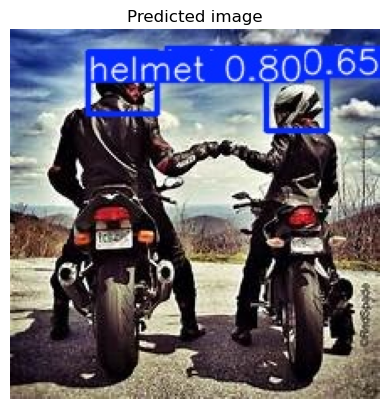

In [20]:
img = cv2.imread("runs/detect/predict/test3.jpg")

if img is not None:
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predicted image")
    plt.show(block=True)
else:
    print("Image not load.")

## Image with No Helmet

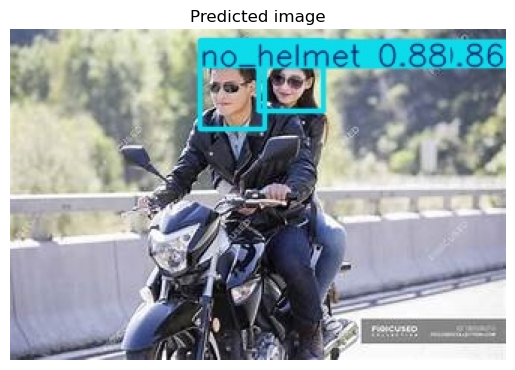

In [30]:
img = cv2.imread("runs/detect/predict/test2.jpg")

if img is not None:
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predicted image")
    plt.show(block=True)
else:
    print("Image not load.")

## ✅ Prediction on Video (Mandatory Lab Task)

In [12]:
cap = cv2.VideoCapture("helmet_test.mp4")  # video file name

if not cap.isOpened():
    print("Video not opened. Check file path.")
else:
    print("Video started. Press Q to quit.")

    while True:
        ret , img = cap.read()
        if not ret:
            print("Could not read frame.")
            break
            
        results = model.predict(source=img  , conf=0.10  , verbose=False)

        # draw boxes and labels at image
        annotated = results[0].plot() 
        
        
        cv2.imshow("Live Detection (Press Q to quit)", annotated)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

Video started. Press Q to quit.


📌 Students must **submit output video**


## ✅ Live Webcam Prediction

In [10]:
cap = cv2.VideoCapture(0) 

if not cap.isOpened():
    print("Video not opened. Check file path.")
else:
    print("Video started. Press Q to quit.")

    while True:
        ret , img = cap.read()
        if not ret:
            print("Could not read frame.")
            break
            
        results = model.predict(source=img  , conf=0.30  , verbose=False)
        
        annotated = results[0].plot() 
        
        
        cv2.imshow("Live Detection (Press Q to quit)", annotated)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

Video started. Press Q to quit.


**Helmet detection should work live.**

# 🧠 PART 7-B — Error Analysis (Deep Engineer-Level Understanding)

## 1️⃣ What is an Error in Object Detection?

In machine learning, an **error** occurs when:

> The model’s prediction does not match the ground truth (actual annotated reality).

In simple terms:

* The model makes a **wrong decision**.
* The predicted bounding box, class, or confidence is incorrect.

### ⚠ Important Industry Reality

In real-world AI projects:

> 70% of the engineering effort is spent on error analysis and improvement — not just training.

Training a model is easy.<br>
Understanding *why it fails* is what makes you an engineer.


# 2️⃣ What Does an AI Engineer Actually Do?

A beginner checks only:

* mAP score
* Accuracy
* Loss value

A professional engineer asks:

* Where is the model failing?
* Under what image conditions is it failing?
* Why is it failing?
* Is this a data problem or a model problem?

This mindset separates students from industry engineers.

# Confusion matrix

In [13]:
metrics = model.val(data="dataset/data.yaml")

Ultralytics 8.4.12  Python-3.13.9 torch-2.10.0+cpu CPU (13th Gen Intel Core i7-1355U)
val: Fast image access  (ping: 0.40.1 ms, read: 161.461.8 MB/s, size: 539.2 KB)
val: Scanning C:\Users\User\OpenCV\Lecture 7\dataset\labels\val.cache... 50 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 51/51 36.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.4s/it 9.4s4.4ss
                   all         51        135      0.819      0.736      0.808      0.478
                helmet         40         95      0.833      0.747      0.818      0.453
             no_helmet         17         40      0.805      0.725      0.797      0.502
Speed: 2.2ms preprocess, 130.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to C:\Users\User\OpenCV\Lecture 7\runs\detect\val


**Now**  : automatically ye folder me save ho jata hai:

```
runs/detect/val/
```

Waha tumhe ye files milengi:

```
confusion_matrix.png
confusion_matrix_normalized.png

## Confusion matrix ka matlab 

Helmet detection ke case me matrix kuch aisa hota hai:

| Actual \ Predicted | Helmet  | No Helmet |
| ------------------ | ------- | --------- |
| Helmet             | correct | error     |
| No Helmet          | error   | correct   |

Diagonal values = correct predictions
Off-diagonal = mistakes


## Open Confusion matrix 

In [15]:
import matplotlib.pyplot as plt

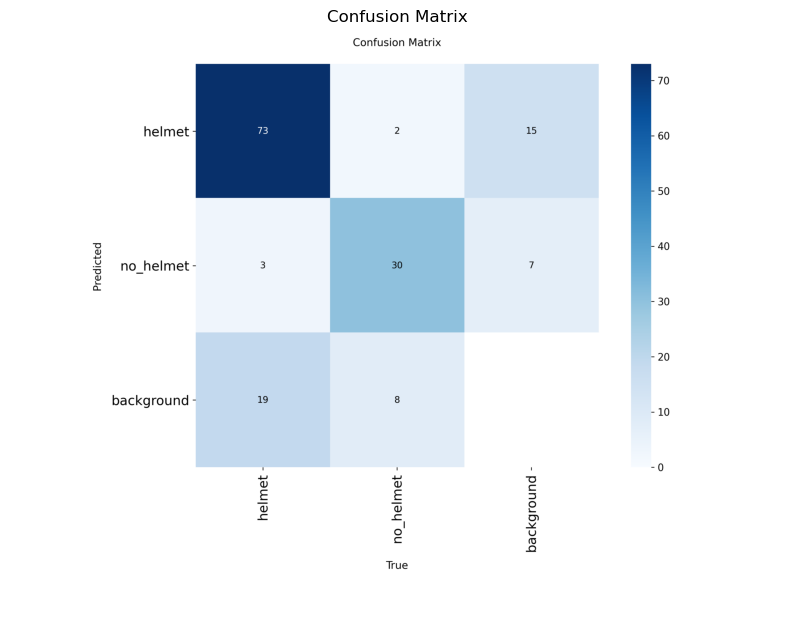

In [16]:
img = cv2.imread("runs/detect/val/confusion_matrix.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,15))
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()

# 3️⃣ Step 1 — Where to Start Error Analysis?

After running predictions, YOLO creates:

```
runs/detect/predict/
```

Inside this folder you will find:

* Output images with bounding boxes
* Confidence scores
* Predicted class labels

### First Rule of Error Analysis:

> Manually inspect prediction outputs.

Look at each image carefully.

Do not trust only metrics.


# 4️⃣ Main Types of Errors (Industry Standard)

In object detection, there are four major error types:

1. False Positive (FP)
2. False Negative (FN)
3. Localization Error
4. Classification Confusion

We now analyze each in detail.

# ❌ 1️⃣ False Positive (FP)

## Definition

The model predicts:

> “Helmet detected”

But in reality:

> No helmet exists.

---

## Real Example

* A plastic bag detected as helmet
* A white cap detected as helmet
* Background object misclassified

---

## What Does This Mean?

This indicates a **precision problem**.

Precision measures:

> Out of all detected helmets, how many were correct?

If false positives are high → precision decreases.

---

## How to Identify False Positives?

You will observe:

* Bounding box on empty area
* Detection on wrong object
* Often low confidence (e.g., 0.25–0.40)

---

## Why Does This Happen?

* Model is too sensitive
* Background not included in training
* Poor annotation quality
* Low confidence threshold

---

## How to Fix False Positives?

### ✅ Fix 1 — Increase Confidence Threshold

Example:

```python
model.predict(source="image.jpg", conf=0.5)
```

Effect:

* Reduces weak predictions
* Improves precision
* Slightly reduces recall

---

### ✅ Fix 2 — Add More Background Images

Add images containing:

* Workers without helmets
* Empty construction scenes
* Similar-looking objects

This helps the model learn what is NOT a helmet.

---

### ✅ Fix 3 — Improve Annotation Quality

Ensure:

* No incorrect bounding boxes
* No overlapping incorrect labels
* Tight and accurate annotation

# ❌ 2️⃣ False Negative (FN)

## Definition

In reality:

> Helmet exists

But the model fails to detect it.

---

## What Does This Mean?

This indicates a **recall problem**.

Recall measures:

> Out of all real helmets, how many were detected?

If false negatives are high → recall decreases.

---

## How to Identify False Negatives?

You will observe:

* Helmet clearly visible
* No bounding box drawn

---

## Why Does This Happen?

* Insufficient training data
* Small object size
* Poor lighting
* Occlusion
* Model underfitting

---

## How to Fix False Negatives?

### ✅ Fix 1 — Increase Dataset Diversity

Include:

* Different helmet colors
* Multiple angles (front, side, back)
* Different lighting conditions
* Small helmets (far distance)

---

### ✅ Fix 2 — Increase Image Resolution

Example:

```python
model.train(imgsz=800)
```

Higher resolution improves detection of small objects.

---

### ✅ Fix 3 — Increase Epochs

```python
model.train(epochs=120)
```

Allows better feature learning.

---

### ✅ Fix 4 — Improve Bounding Box Quality

Ensure:

* Boxes tightly surround the helmet
* No large background included
* Consistency across dataset

# ❌ 3️⃣ Localization Error

## Definition

The model detects the helmet but:

* Bounding box is misplaced
* Box is too large or too small
* Box partially covers object

---

## Example

* Only half helmet covered
* Box shifted above the head
* Box includes large background

---

## What Does This Mean?

This is a **bounding box regression issue**.

Usually caused by:

* Inconsistent annotations
* Loose bounding boxes
* Limited training data

---

## How to Fix Localization Errors?

* Re-annotate dataset carefully
* Ensure consistent box placement
* Increase training epochs
* Add more varied data

# ❌ 4️⃣ Classification Confusion

## Definition

The model confuses classes:

* Helmet predicted as NoHelmet
* NoHelmet predicted as Helmet

---

## Why Does This Happen?

* Dataset imbalance
* Classes visually similar
* Poor feature separation

---

## How to Detect This?

Check:

```
confusion_matrix.png
```

If off-diagonal values are high:

→ Class confusion exists

---

## How to Fix It?

* Balance dataset (equal class samples)
* Add difficult examples
* Add confusing real-world scenarios
* Increase dataset size

# 5️⃣ Advanced Error Categorization (Professional Level)

Professional engineers divide errors by image condition:

| Image Condition | Error Observed    | Root Cause          |
| --------------- | ----------------- | ------------------- |
| Low Light       | Missed helmets    | Feature not visible |
| Side Angle      | Misclassification | Angle bias          |
| Small Object    | Not detected      | Resolution limit    |
| Crowd           | Overlapping boxes | Occlusion           |

**This helps identify dataset weaknesses.**



### Low Light → Missed helmets → Feature not visible

Matlab:

* Jab image dark hoti hai, helmet clearly visible nahi hota
* Model ko edges / shape / color detect karne me mushkil hoti hai
* Result → **helmet detect nahi hota (False Negative)**

Example:
Night-time bike rider image.


### Side Angle → Misclassification → Angle bias

Matlab:

* Helmet front se train hua hai, side view kam dekha hai
* Model confuse ho jata hai helmet vs no-helmet

Result:

* helmet ko **no_helmet predict kar sakta hai**
* ya opposite

Isko kehte hain **angle bias**.
 

### Small Object → Not detected → Resolution limit

Matlab:

* Helmet image me bahut chhota hai
* YOLO feature maps me object lost ho jata hai

Result:

* detection miss ho jati hai

Ye especially hota hai:

* far camera
* CCTV footage
* wide images

Iska solution hota hai:

* imgsz increase
* small-object images dataset me add karna
 

### Crowd → Overlapping boxes → Occlusion

Matlab:

* Multiple riders close hain
* helmets partially hidden hain

Model ko:

* box boundaries samajhna mushkil hota hai
* objects merge ho sakte hain

Result:

* wrong bounding boxes
* missed detections

Isko **occlusion problem** kehte hain.
 

Agar interview me explain karna ho to ek line me bolna:

> These errors occur due to insufficient visual features, dataset bias, object scale limitations, and occlusion in complex scenes.
 

# 6️⃣ Error → Action Mapping (Engineer Table)

| Error Type         | Meaning               | Action              |
| ------------------ | --------------------- | ------------------- |
| False Positive     | Model too sensitive   | Increase confidence |
| False Negative     | Model missing objects | Add data            |
| Localization Error | Weak bounding box     | Improve annotation  |
| Class Confusion    | Similar classes       | Balance dataset     |

This mapping is used daily in industry.

# 7️⃣ How Students Should Write Error Analysis Report

Students must include:

1. Which error type is dominant?
2. Under what image condition does it occur?
3. What is the root cause?
4. What improvement strategy is proposed?

Example:

> The model shows high false negatives in low-light images. <br>
> Root cause appears to be insufficient low-light training data.<br>
> Proposed solution: augment dataset with brightness variation and additional night images.

This is professional reporting.

# 8️⃣ Final Engineer Mindset

Beginner asks:

> “What is the mAP score?”

Engineer asks:

* Where does the model fail?
* Why does it fail?
* Is the failure data-driven or model-driven?
* What systematic improvement can be applied?

This mindset builds industry-ready AI engineers.


# 🏠 FINAL LAB SUBMISSION (Strict)

Students must submit:

1️⃣ CVAT annotated dataset<br>
2️⃣ data.yaml<br>
3️⃣ Training screenshot<br>
4️⃣ Confusion matrix screenshot<br>
5️⃣ Prediction video<br>
6️⃣ Short report:

* Precision
* Recall
* Errors observed


# ✅ Lecture 7 COMPLETE (From Annotation → Prediction)

You now taught students:

✔ Industry annotation (CVAT)<br>
✔ Professional training<br>
✔ Image / Video / Webcam prediction<br>
✔ Evaluation metrics<br>
✔ Error analysis<br>